In [78]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2%}'.format

In [79]:
tickers = [
    "NESN.SW",
    "ROG.SW",
    "NOVN.SW",
    "HSBA.L",
    "SAP.DE",
    "AZN.L",
    "ASML.AS",
    "SAN.PA",
    "MC.PA",
    "FP.VI",
    "BP.L",
    "NOVOB.DC",
    "GSK.L",
    "BATS.L",
    "RDSA.L",
    "ALV.DE",
    "DGE.L",
    "UNA.AS",
    "RDSB.L",
    "SIE.DE",
    "IBE.MC",
    "AIR.PA",
    "BAYN.DE",
    "OR.PA",
    "ENEL.MI",
    "ULVR.L",
    "AI.PA",
    "ZURN.SW",
    "SU.PA",
    "RB.L",
    "SAN.MC",
    "BAS.DE",
    "DTE.DE",
    "DG.PA",
    "BNP.PA",
    "NG.L",
    "ADS.DE",
    "REL.L",
    "VOD.L",
    "ABI.BR",
    "RIO.L",
    "SAF.PA",
    "BN.PA",
    "CS.PA",
    "LLOY.L",
    "ABBN.SW",
    "PRU.L",
    "KER.PA",
    "EL.PA",
    "UBSG.SW",
    "PHIA.AS",
    "MUV2.DE",
    "BHP.L",
    "RI.PA",
    "ISP.MI",
    "CFR.SW",
    "DAI.DE",
    "INGA.AS",
    "CPG.L",
    "ITX.MC",
    "AAL.L",
    "EXPN.L",
    "LSE.L",
    "DB1.DE",
    "ENGI.PA",
    "VNA.DE",
    "LONN.SW",
    "PRX.AS",
    "ENI.MI",
    "BBVA.MC",
    "ALC.SW",
    "VOW3.DE",
    "TSCO.L",
    "SREN.SW",
    "AMS.SW",
    "AD.PA",
    "CRH.IR",
    "BARC.L",
    "DPW.DE",
    "TEF.MC",
    "EOAN.DE",
    "ORA.PA",
    "CSGN.SW",
    "GIVN.SW",
    "GLEN.L",
    "RMS.PA",
    "NDA.ST",
    "VOLVB.ST",
    "BA.L",
    "HEIA.AS",
    "IFX.DE",
    "UCG.MI",
    "INVE-B.ST",
    "SIKA.SW",
    "LHN.SW",
    "KBC.BR",
    "KNEBV.FH",
    "ATCO-A.ST",
    "DSM.AS",
    "ADYEN.AS",
    "DSY.PA",
    "ASSAB.ST",
    "SSE.L",
    "DSV.CO",
    "VIV.PA",
    "WKL.AS",
    "G.PA",
    "FERG.L",
    "RWE.DE",
    "VWS.CO",
    "ERIC-B.ST",
    "BMW.DE",
    "SAMPO.HE",
    "GLE.PA",
    "SN.L",
    "NOKIA.HE",
    "KYG.ID",
    "IMB.L",
    "SGO.PA",
    "ESSITY-B.ST",
    "LR.PA",
    "GEBN.SW",
    "RACE.MI",
    "FRE.DE",
    "ML.PA",
    "ORSTED.CO",
    "LGEN.L",
    "STAN.L",
    "SAND.ST",
    "STM.MI",
    "AV.L",
    "VIE.PA",
    "REP.PA",
    "NESTE.HE",
    "PGHN.SW",
    "CAP.PA",
    "FME.DE",
    "AKZA.AS",
    "EQNR.OL",
    "COLOB.CO",
    "MRK.DE",
    "UPM.HE",
    "HEN3.DE",
    "DBK.DE",
    "URW.AS",
    "SLHN.SW",
    "GMAB.CO",
    "DWNI.DE",
    "SEBA.SW",
    "SHBA.SW",
    "BT-A.L",
    "TEP.PA",
    "SCMN.SW",
    "FER.PA",
    "HEXAB.SW",
    "WDI.DE",
    "SWEDA.ST",
    "AHT.L",
    "CLNX.SW",
    "CARLB.CO",
    "RR.L",
    "HMB.ST",
    "DNB.NO",
    "ACA.PA",
    "SOON.SW",
    "SGSN.SW",
    "UCB.BR",
    "SY1.DE",
    "FCAU",
    "EDEN.PA",
    "MRO.L",
    "MTX.AS",
    "RTO.L",
    "SGRO.L",
    "III.L",
    "AENA.MC",
    "WPP.L",
    "NZYMB.CO",
    "SRG.IM",
    "ITRK.L",
    "SWMA.ST",
    "PSN.L",
    "EDP.PL",
    "GLPG.AS",
    "STMN.SW",
    "HO.PA",
    "CA.PA",
    "BEI.DE",
    "DANSKE.CO",
    "HNR1.DE",
    "NN.AS",
    "TELIA.ST",
    "UG.PA",
    "LISN.SW",
    "TEL.OL",
    "GFC.PA",
    "DHER.DE",
    "HLMA.L",
    "NXT.L",
    "EN.PA",
    "MNDI.L",
    "ABF.L",
    "TEMN.SW",
    "TRN.IM",
    "SPSN.SW",
    "INF.L",
    "CON.PA",
    "GLE.PA",
    "ATL.MI",
    "IHG.L",
    "GRF.PA",
    "ALO.PA",
    "AT1.DE",
    "BDEV.L",
    "FORTUM.HE",
    "KSP.ID",
    "RBS.L",
    "PAH3.DE",
    "QGEN",
    "EBS.DE",
    "HEIO.OL",
    "ELISA.HE",
    "RO.PA",
    "LISP.SW",
    "BAER.SW",
    "FLTR.L",
    "MOWI.OL",
    "CABK.MC",
    "MT.AS",
    "UU.L",
    "KPN.AS",
    "SCHP.SW",
    "CNHI",
    "BRBY.L",
    "UMI.BR",
    "FGR.PA",
    "REE.MC",
    "FLTRL.PA",
    "ELE.PA",
    "AGS.PA",
    "TW.L",
    "ADEN.SW",
    "OCDO.L",
    "LEG.PA",
    "PUB.PA",
    "BNZL.L",
    "HEI.DE",
    "SLA.L",
    "SVT.L",
    "SW.PA",
    "BALN.SW",
    "SPX.L",
    "BKG.L",
    "TEL2-B.ST",
    "SKG.ID",
    "LAND.L",
    "NTGY.PA",
    "SKAB.ST",
    "CRDA.L",
    "ACS.MC",
    "KNIN.SW",
    "SMIN.L",
    "CHR.MI",
    "VIFN.SW",
    "DCC.L",
    "BNR.PA",
    "MONC.MI",
    "GBLB.BR",
    "ADM.L",
    "SEV.PA",
    "ATO.PA",
    "LOGN.SW",
    "STERV.HE",
    "UHR.SW",
    "RSA.L",
    "EPI.PA",
    "ORK.OL",
    "EXO.MI",
    "AKE.PA",
    "STJ.L",
    "MNG.L",
    "EDF.PA",
    "ALFA.AS",
    "AC.PA",
    "YAR.OL",
    "1COV.DE",
    "JMAT.L",
    "GALP.PL",
    "BVI.PA",
    "SKF-B.ST",
    "LI.PA",
    "SOLB.BR",
    "WTB.L",
    "MAERSK-B.CO",
    "SCAB.ST",
    "PRY.MI",
    "ENG.SM",
    "RAND.OL",
    "RYAAY",
    "GVC.L",
    "BLND.L",
    "UBI.PA",
    "MB.PA",
    "SMDS.L",
    "PSON.L",
    "BOL.PA",
    "OMV.VI",
    "DLG.DE",
    "MRW.L",
    "TIT.MI",
    "SCR.PA",
    "CLN.SW",
    "CNA.L",
    "VOW3.DE",
    "FR.PA",
    "ABN.AS",
    "RNO.PA",
    "ELUX-B.ST",
    "KINVB.HE",
    "CCL.L",
    "HL.L",
    "CBK.DE",
    "ADP.PA",
    "KGF.L",
    "WRT1V.HE",
    "ITV.L",
    "IAG.L",
    "SBRY.L",
    "SAB.MC",
    "AGN.SW",
    "SCHN.SW",
    "SDR.L",
    "PNDORA.CO",
    "TATE.L",
    "TPK.DE",
    "WEIR.L",
    "SECUB.ST",
    "LXS.DE",
    "G1A.DE",
    "TEN.MI",
    "INDUC.AS",
    "MKS.L",
    "PROX.BR",
    "LDO.PA",
    "METSO.HE",
    "UTDI.DE",
    "NHY.OL",
    "INDUA.AS",
    "IMI.L",
    "EZJ.L",
    "TKA.DE",
    "MCRO.L",
    "SESG.PA",
    "TITR.MI",
    "BIRG.IR",
    "TUI.L",
    "GFS.L",
    "LHA.DE",
    "BMW3.DE",
    "UHRN.SW"
]

In [80]:
# Date range
start = '2012-01-01'
end = '2022-12-31'

assets = list(set(tickers))
assets.sort()

# Downloading data
data = yf.download(assets, start= start, end= end)

[**                     4%                       ]  16 of 358 completed

In [ ]:
data = data.loc[ :,("Adj Close")]

In [ ]:
Y = data[assets].fillna(method = "bfill").pct_change()
threshold = len(Y) - (0.1 * len(Y))  # Remove columns with 2 or more NaN values

# Drop columns with the specified threshold
df_filtered = Y.dropna(thresh=threshold, axis=1)

# Print the resulting DataFrame
stock_returns = df_filtered.dropna()

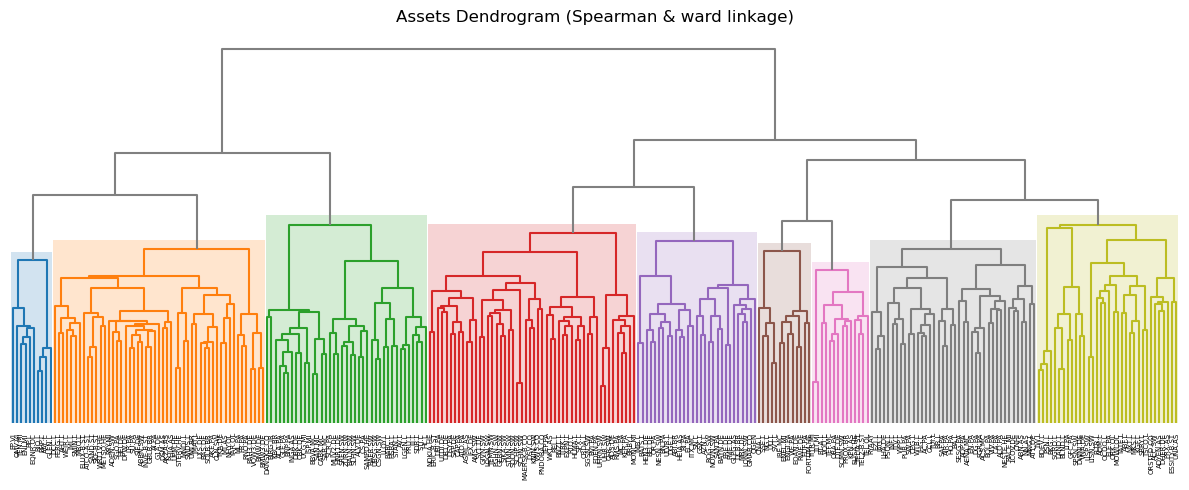

In [ ]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns= stock_returns,
                        codependence='spearman',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax= None)

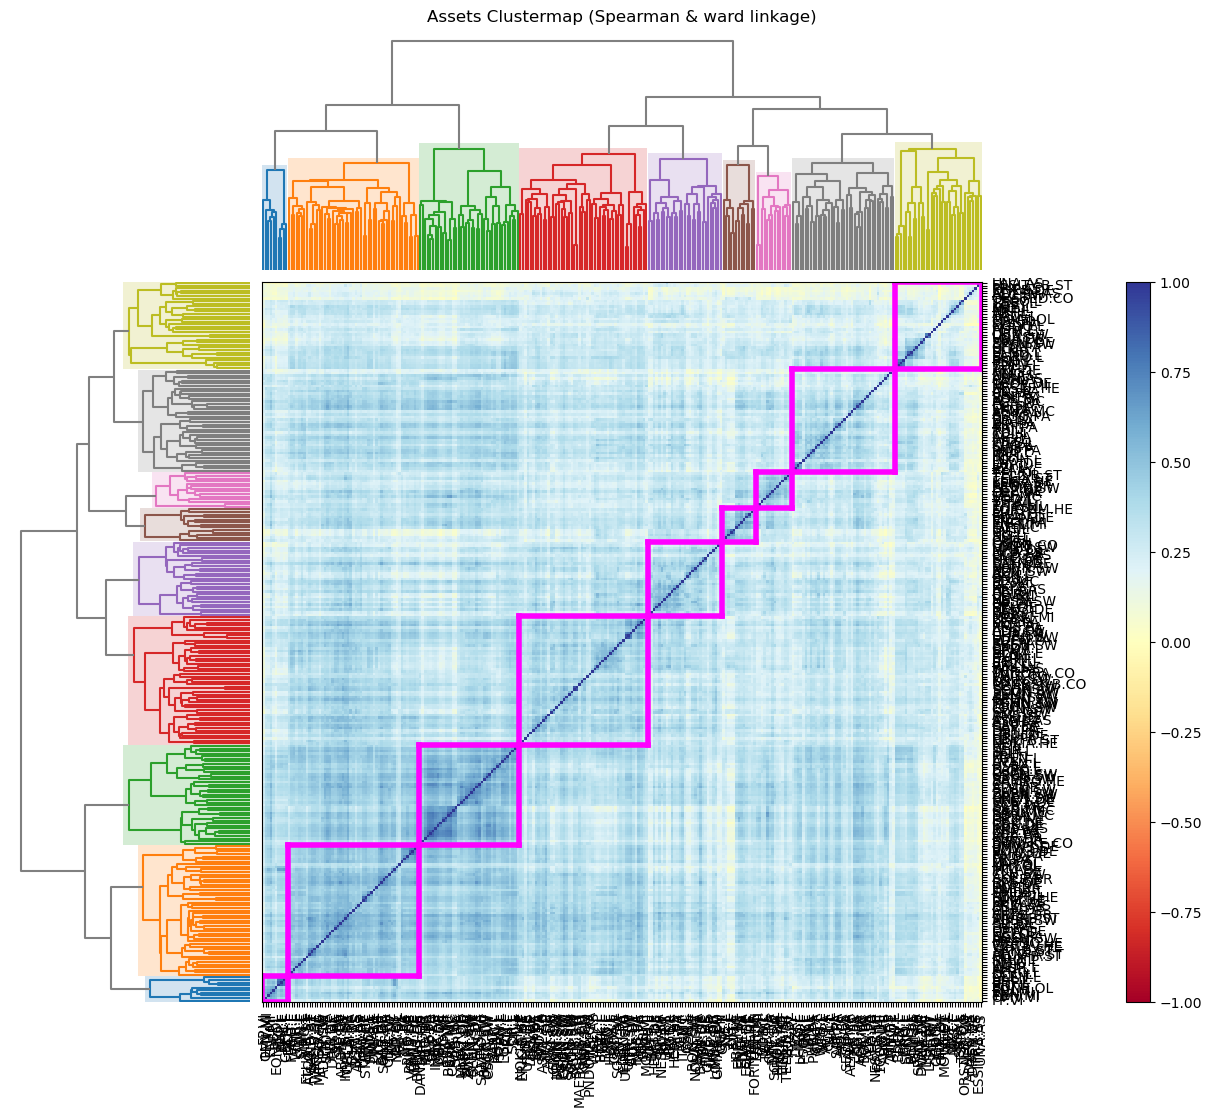

In [ ]:
ax = rp.plot_clusters(returns=stock_returns,
                      codependence='spearman',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

### HRP

,1COV.DE,AAL.L,ABBN.SW,ABF.L,ABI.BR,ABN.AS,AC.PA,ACA.PA,ACS.MC,ADEN.SW,...,VOD.L,VOW3.DE,VWS.CO,WEIR.L,WKL.AS,WPP.L,WRT1V.HE,WTB.L,YAR.OL,ZURN.SW
weights,0.34%,0.13%,0.50%,0.35%,0.30%,0.30%,0.25%,0.20%,0.23%,0.32%,...,0.41%,0.21%,0.14%,0.19%,0.72%,0.00%,0.24%,0.27%,0.36%,0.63%


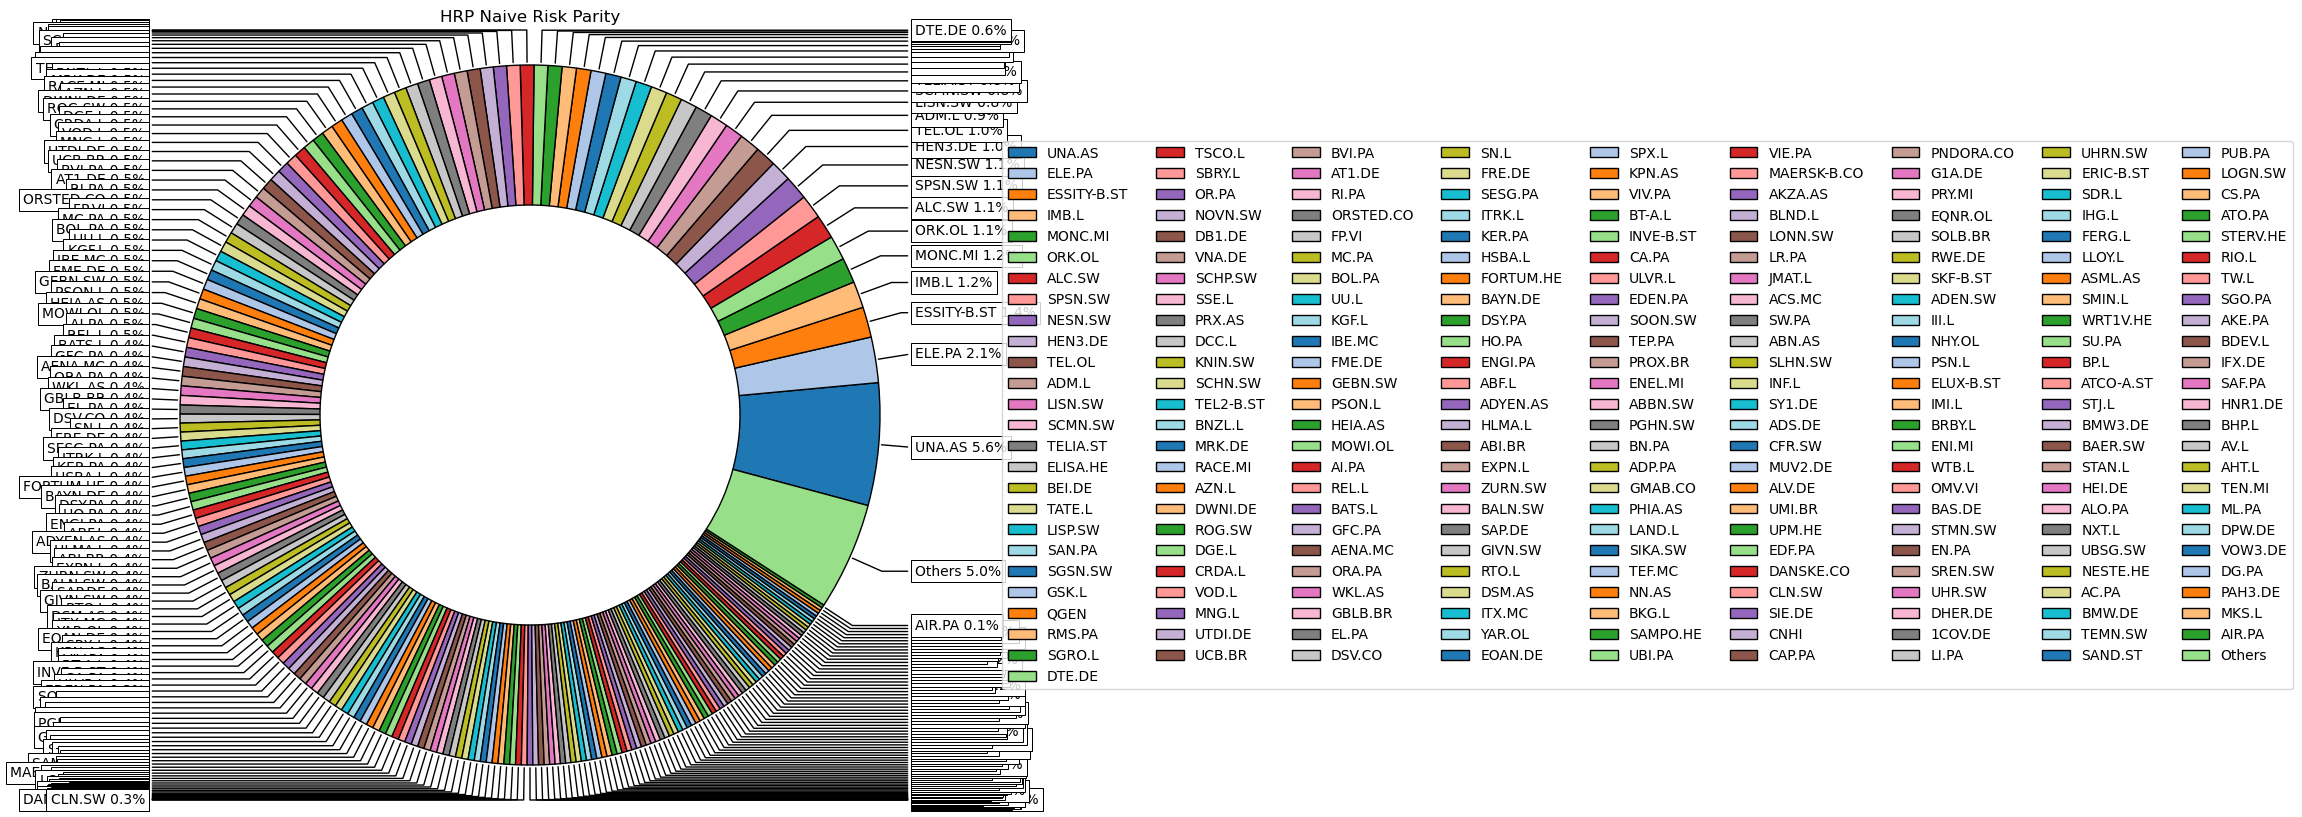

In [ ]:
# Building the portfolio object
port = rp.HCPortfolio(returns=stock_returns)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

hrp_w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(hrp_w.T)

# Plotting the composition of the portfolio

ax = rp.plot_pie(w= hrp_w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=10,
                 width=12,
                 ax=None)

In [ ]:
hrp_w.describe()

,weights
count,28000.00%
mean,0.36%
std,0.41%
min,0.00%
25%,0.18%
50%,0.27%
75%,0.44%
max,5.64%


In [ ]:
### HERC

,1COV.DE,AAL.L,ABBN.SW,ABF.L,ABI.BR,ABN.AS,AC.PA,ACA.PA,ACS.MC,ADEN.SW,...,VOD.L,VOW3.DE,VWS.CO,WEIR.L,WKL.AS,WPP.L,WRT1V.HE,WTB.L,YAR.OL,ZURN.SW
weights,0.34%,0.13%,0.50%,0.35%,0.30%,0.30%,0.25%,0.20%,0.23%,0.32%,...,0.41%,0.21%,0.14%,0.19%,0.72%,0.00%,0.24%,0.27%,0.36%,0.63%


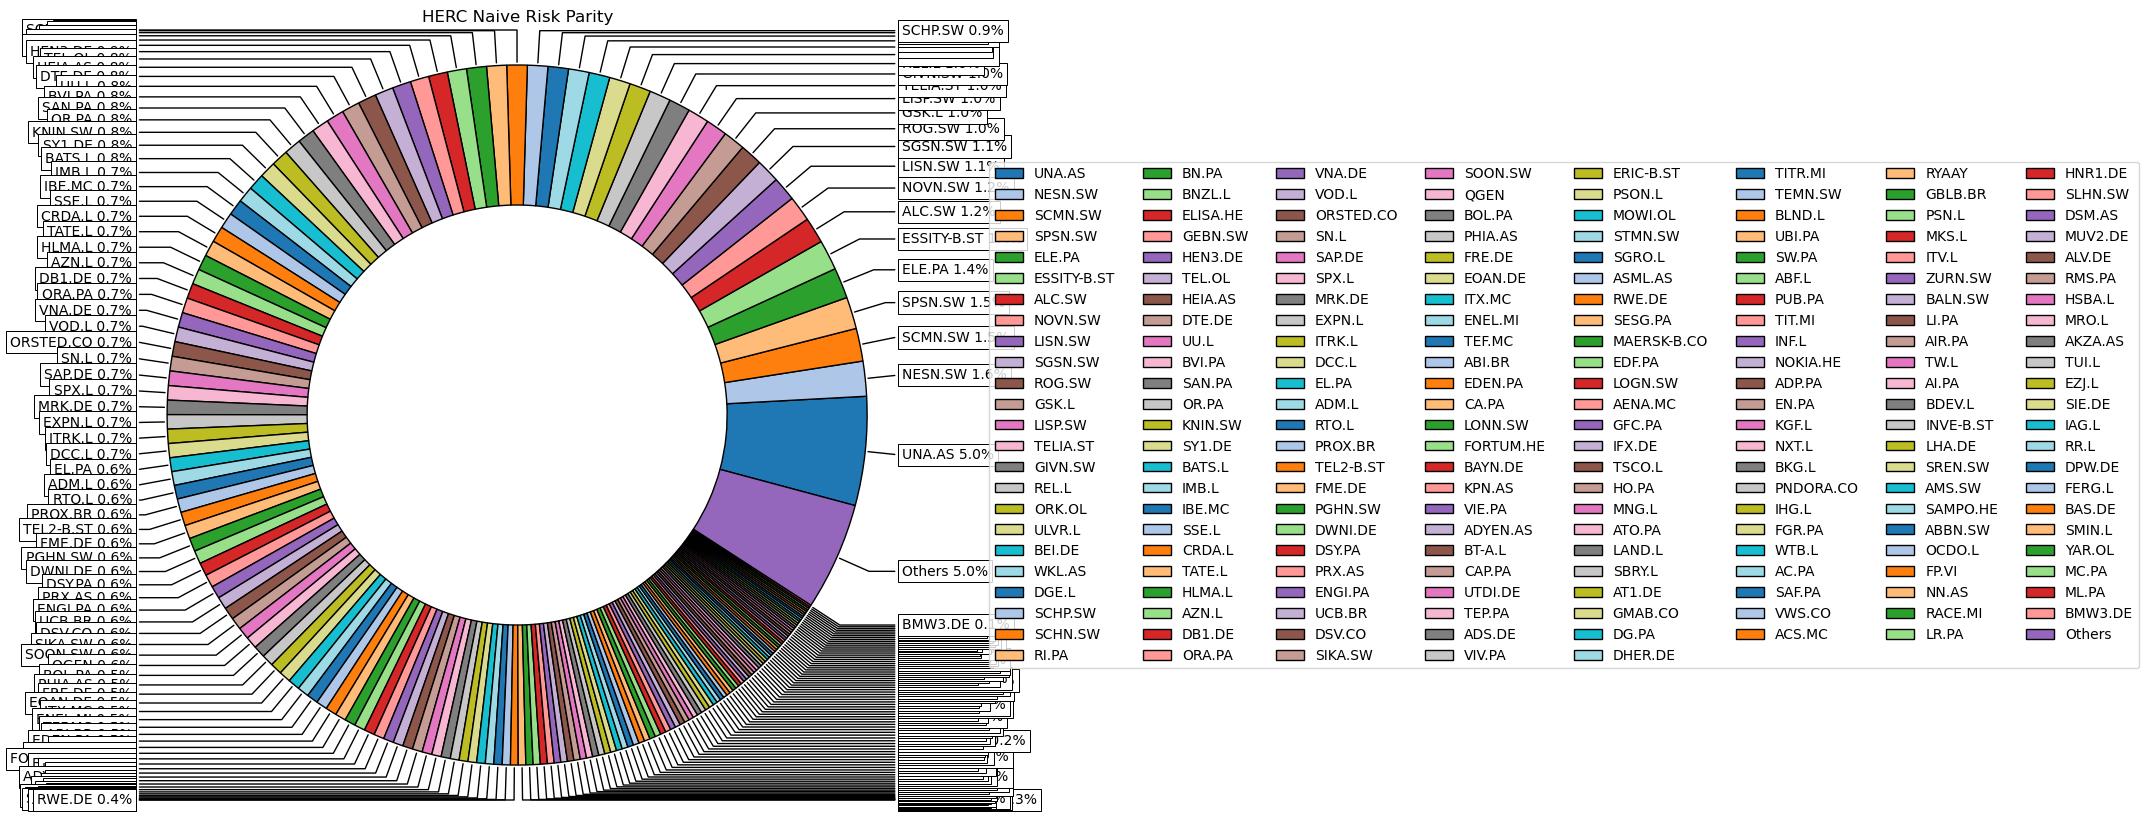

In [ ]:
# Building the portfolio object
port = rp.HCPortfolio(returns=stock_returns)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

herc_w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(herc_w.T)

ax = rp.plot_pie(w= herc_w,
                 title='HERC Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=10,
                 width=12,
                 ax=None)